In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
num_entites = 100
num_variables = 10
num_time_periods = 156

In [3]:
time_periods = pd.date_range(start='2005', end='2018', freq='M')

In [4]:
time_periods

DatetimeIndex(['2005-01-31', '2005-02-28', '2005-03-31', '2005-04-30',
               '2005-05-31', '2005-06-30', '2005-07-31', '2005-08-31',
               '2005-09-30', '2005-10-31',
               ...
               '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30',
               '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31',
               '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', length=156, freq='M')

In [5]:
panel_data = pd.DataFrame(index=pd.MultiIndex.from_product([time_periods, range(num_entites)], 
                                                           names=['Time', 'Entity'])).reset_index()

In [6]:
panel_data

,Time,Entity
0,2005-01-31,0
1,2005-01-31,1
2,2005-01-31,2
3,2005-01-31,3
4,2005-01-31,4
...,...,...
15595,2017-12-31,95
15596,2017-12-31,96
15597,2017-12-31,97
15598,2017-12-31,98


In [7]:
values = np.random.randint(0, 2, size=panel_data.shape[0])
panel_data['Gender'] = values
panel_data

,Time,Entity,Gender
0,2005-01-31,0,0
1,2005-01-31,1,1
2,2005-01-31,2,0
3,2005-01-31,3,0
4,2005-01-31,4,1
...,...,...,...
15595,2017-12-31,95,1
15596,2017-12-31,96,1
15597,2017-12-31,97,0
15598,2017-12-31,98,0


In [8]:
#Кол-во людей по гендеру
panel_data.Gender.value_counts()

0    7838
1    7762
Name: Gender, dtype: int64

In [9]:
entity_values = np.random.randint(0, 9, size = num_entites)
entity_dict = {entity: value for entity, value in enumerate(entity_values)}

In [10]:
panel_data['Category'] = panel_data['Entity'].map(entity_dict)
panel_data

,Time,Entity,Gender,Category
0,2005-01-31,0,0,2
1,2005-01-31,1,1,2
2,2005-01-31,2,0,8
3,2005-01-31,3,0,6
4,2005-01-31,4,1,6
...,...,...,...,...
15595,2017-12-31,95,1,0
15596,2017-12-31,96,1,4
15597,2017-12-31,97,0,1
15598,2017-12-31,98,0,6


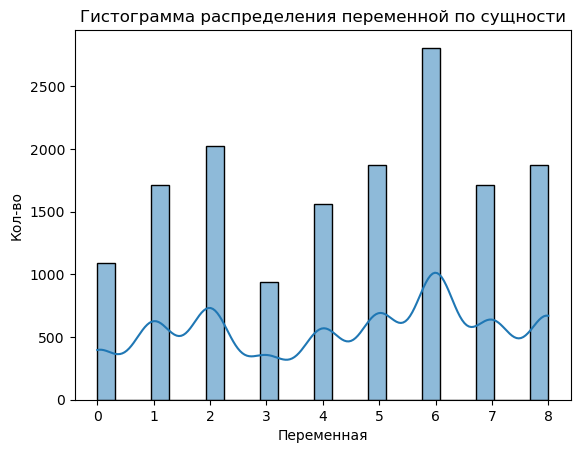

In [11]:
sns.histplot(panel_data.Category, kde=True)
plt.title('Гистограмма распределения переменной по сущности')
plt.ylabel('Кол-во')
plt.xlabel('Переменная')
plt.show()

In [12]:
distributions = [{'Category': 0,'mean': 20, 'std': 5},
                 {'Category': 1,'mean': 28, 'std': 8},
                 {'Category': 2,'mean': 35, 'std': 4},
                 {'Category': 3,'mean': 39, 'std': 6},
                 {'Category': 4,'mean': 44, 'std': 9},
                 {'Category': 5,'mean': 47, 'std': 3},
                 {'Category': 6,'mean': 48, 'std': 7},
                 {'Category': 7,'mean': 50, 'std': 6},
                 {'Category': 8,'mean': 60, 'std': 5}]

for dist in distributions:
    category = dist['Category']
    mean = dist['mean']
    std = dist['std']
    size = panel_data.Category.value_counts().loc[category]
    values = np.random.normal(loc=mean, scale=std, size=size)
    panel_data.loc[panel_data['Category'] == category, 'Value'] = values

panel_data

,Time,Entity,Gender,Category,Value
0,2005-01-31,0,0,2,31.171151
1,2005-01-31,1,1,2,28.541357
2,2005-01-31,2,0,8,43.333763
3,2005-01-31,3,0,6,42.940945
4,2005-01-31,4,1,6,48.293871
...,...,...,...,...,...
15595,2017-12-31,95,1,0,13.292704
15596,2017-12-31,96,1,4,50.411843
15597,2017-12-31,97,0,1,36.475538
15598,2017-12-31,98,0,6,47.258260


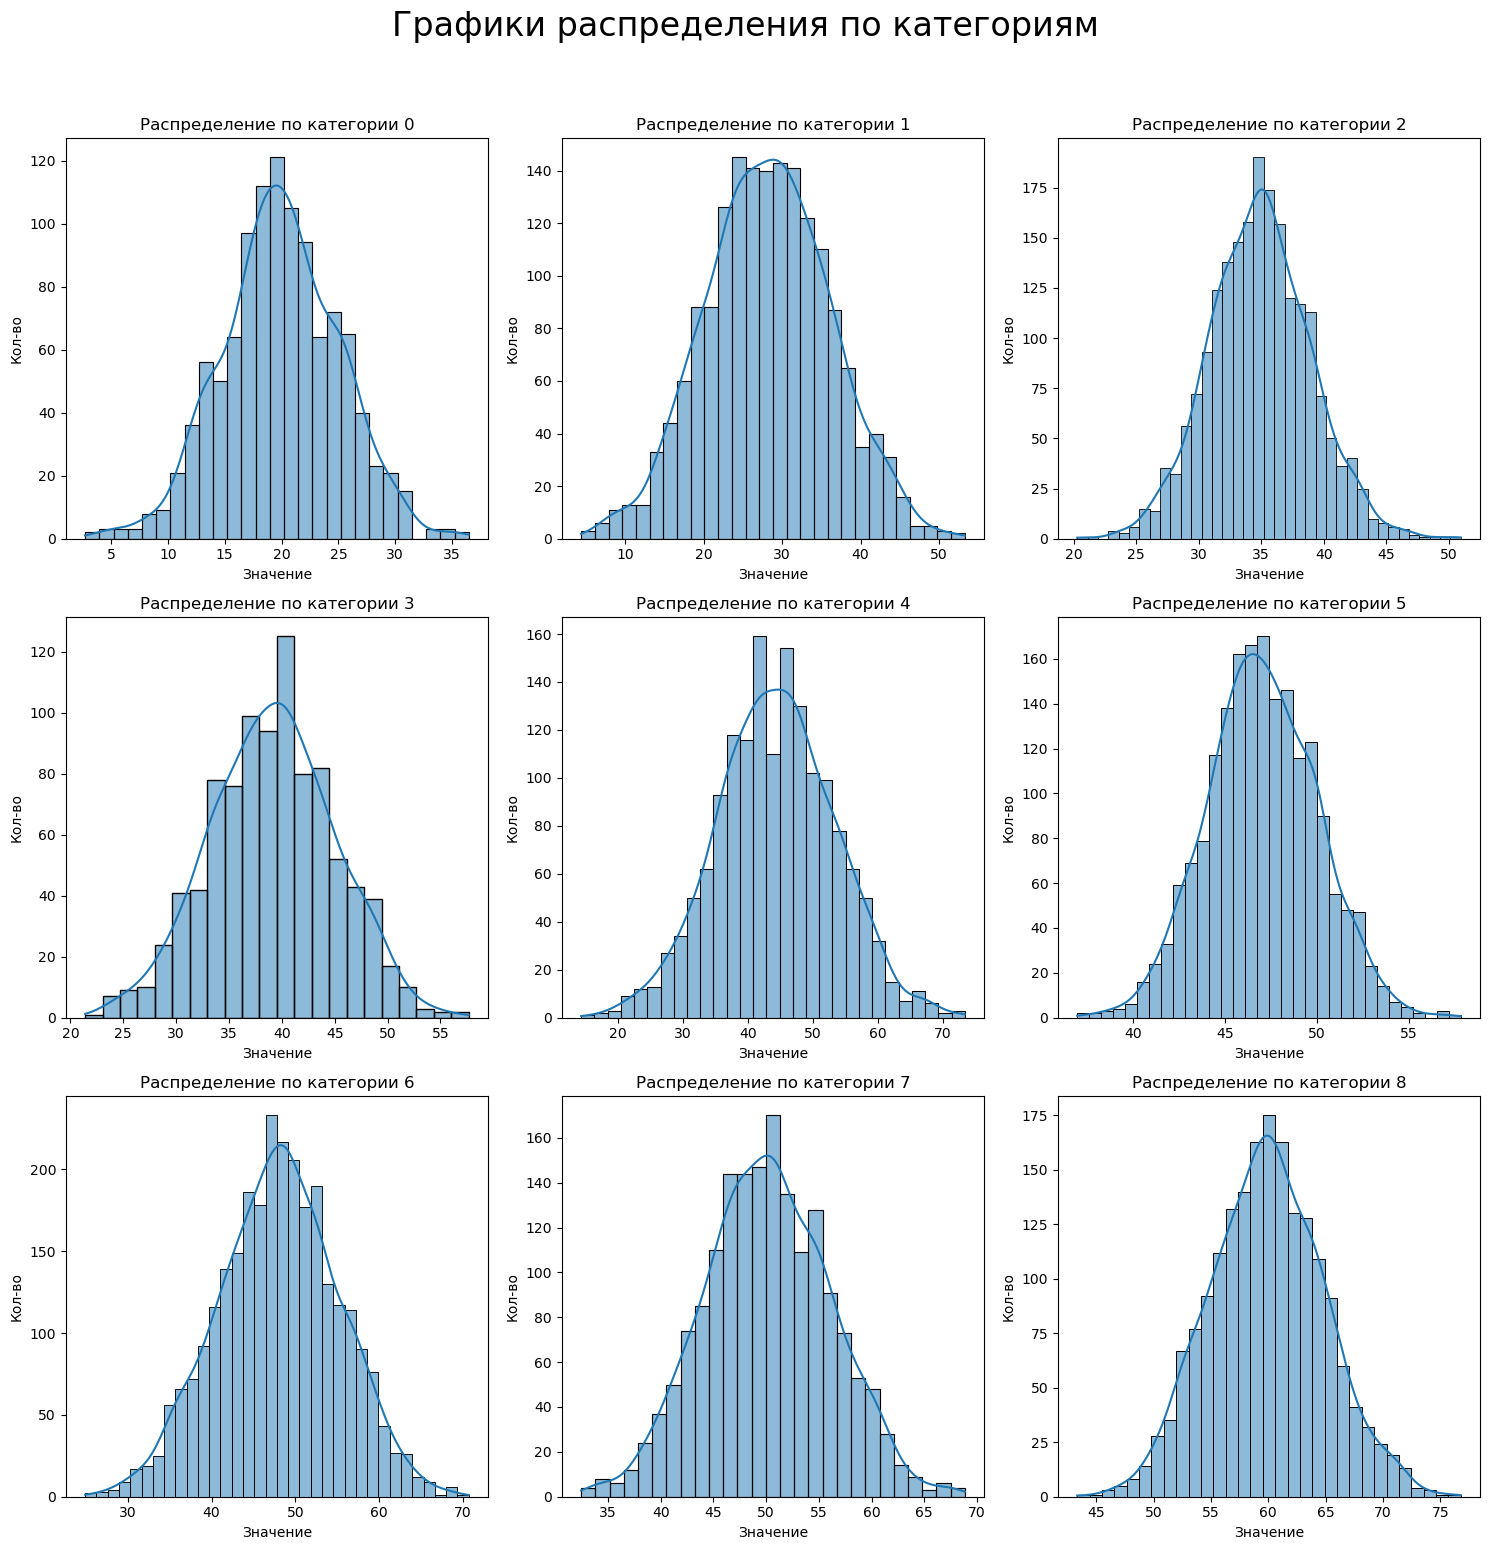

In [13]:
categories = panel_data['Category'].unique()
categories.sort()
num_categories = len(categories)
num_cols = 3
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle('Графики распределения по категориям', fontsize=24, y=1.03)

for idx, category in enumerate(categories):
    row = idx // num_cols
    col = idx % num_cols

    table = panel_data[['Category', 'Value']].query(f'Category == {category}')
    sns.histplot(data=table['Value'], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Распределение по категории {int(category)}')
    axes[row, col].set_xlabel('Значение')
    axes[row, col].set_ylabel('Кол-во')

plt.tight_layout()
plt.show()

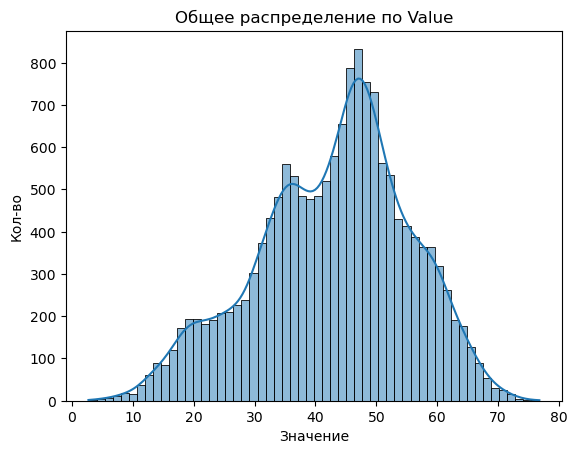

In [14]:
sns.histplot(panel_data.Value,  kde=True)
plt.title('Общее распределение по Value')
plt.xlabel('Значение')
plt.ylabel('Кол-во')
plt.show()

In [15]:
#Столбец который коррелирует с Value и Category
panel_data['Correlated_Column_Value'] = panel_data['Value'] + np.random.normal(loc=30, scale=14, size=panel_data.shape[0])
panel_data

,Time,Entity,Gender,Category,Value,Correlated_Column_Value
0,2005-01-31,0,0,2,31.171151,65.225462
1,2005-01-31,1,1,2,28.541357,72.624329
2,2005-01-31,2,0,8,43.333763,89.098949
3,2005-01-31,3,0,6,42.940945,73.595580
4,2005-01-31,4,1,6,48.293871,93.419784
...,...,...,...,...,...,...
15595,2017-12-31,95,1,0,13.292704,50.171217
15596,2017-12-31,96,1,4,50.411843,62.032251
15597,2017-12-31,97,0,1,36.475538,95.996194
15598,2017-12-31,98,0,6,47.258260,76.812457


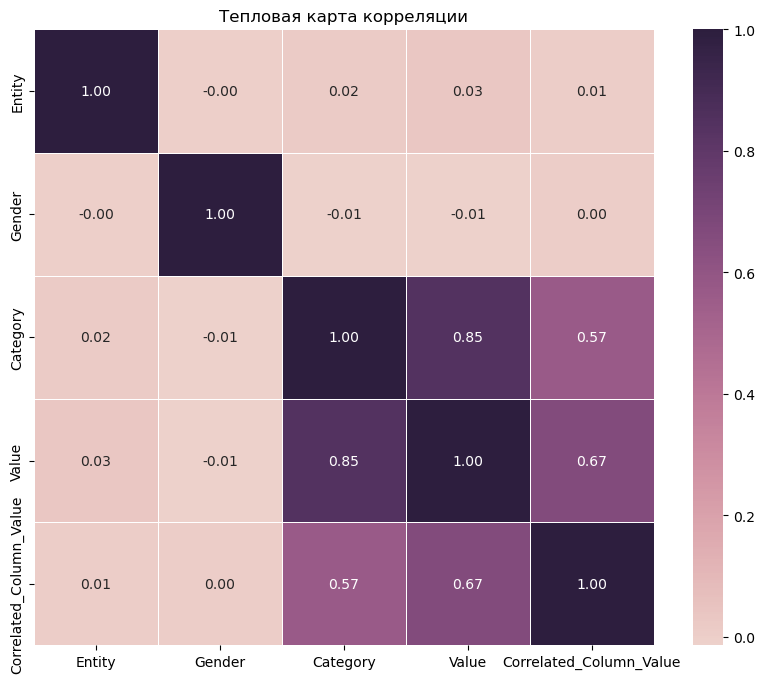

In [16]:
correlation_matrix = panel_data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='.2f', linewidths=0.5)
plt.title('Тепловая карта корреляции')
plt.show()

In [17]:
panel_data

,Time,Entity,Gender,Category,Value,Correlated_Column_Value
0,2005-01-31,0,0,2,31.171151,65.225462
1,2005-01-31,1,1,2,28.541357,72.624329
2,2005-01-31,2,0,8,43.333763,89.098949
3,2005-01-31,3,0,6,42.940945,73.595580
4,2005-01-31,4,1,6,48.293871,93.419784
...,...,...,...,...,...,...
15595,2017-12-31,95,1,0,13.292704,50.171217
15596,2017-12-31,96,1,4,50.411843,62.032251
15597,2017-12-31,97,0,1,36.475538,95.996194
15598,2017-12-31,98,0,6,47.258260,76.812457


In [18]:
"""Создаем столбец с разным распределением по полу.
У гендер = 1 гамма распределение,
У гендера = 2 экспоненциальное распределение"""

distributions = [{'Gender': 0, 'scale': 40},
                 {'Gender': 1,'shape': 10, 'scale': 2}]

for dist in distributions:
    gender = dist['Gender']
    if gender == 0:
        scale = dist['scale']
        size = panel_data.Gender.value_counts().loc[gender]
        values = np.random.exponential(scale, size=size)
        panel_data.loc[panel_data['Gender'] == gender, 'Value_Gender'] = values
    elif gender == 1:
        shape = dist['shape']
        scale = dist['scale']
        size = panel_data.Gender.value_counts().loc[gender]
        values = np.random.gamma(shape, scale, size=size)
        panel_data.loc[panel_data['Gender'] == gender, 'Value_Gender'] = values
panel_data

,Time,Entity,Gender,Category,Value,Correlated_Column_Value,Value_Gender
0,2005-01-31,0,0,2,31.171151,65.225462,25.243962
1,2005-01-31,1,1,2,28.541357,72.624329,17.518267
2,2005-01-31,2,0,8,43.333763,89.098949,101.133156
3,2005-01-31,3,0,6,42.940945,73.595580,39.073058
4,2005-01-31,4,1,6,48.293871,93.419784,28.776789
...,...,...,...,...,...,...,...
15595,2017-12-31,95,1,0,13.292704,50.171217,27.523553
15596,2017-12-31,96,1,4,50.411843,62.032251,15.650963
15597,2017-12-31,97,0,1,36.475538,95.996194,28.502206
15598,2017-12-31,98,0,6,47.258260,76.812457,16.322681


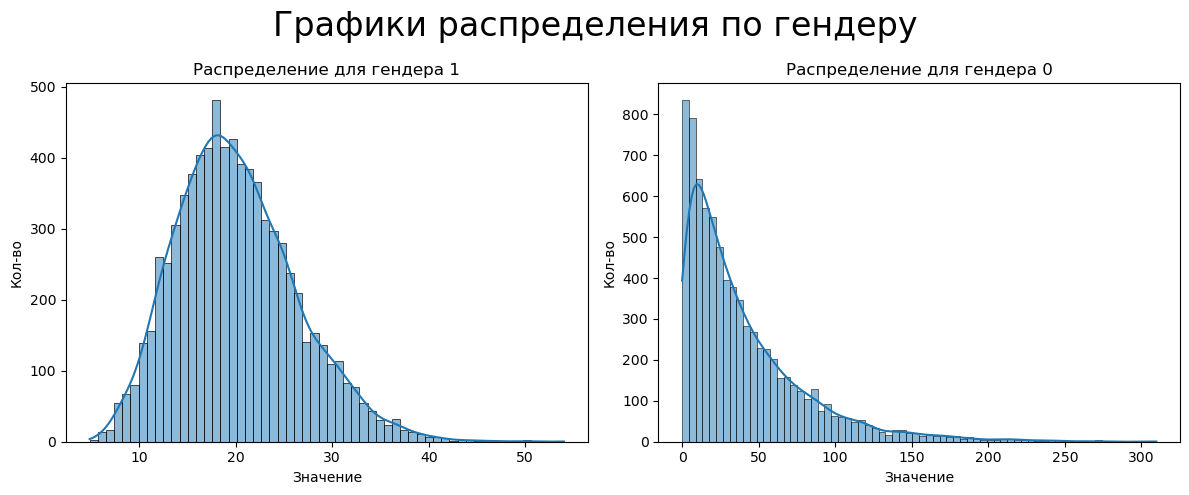

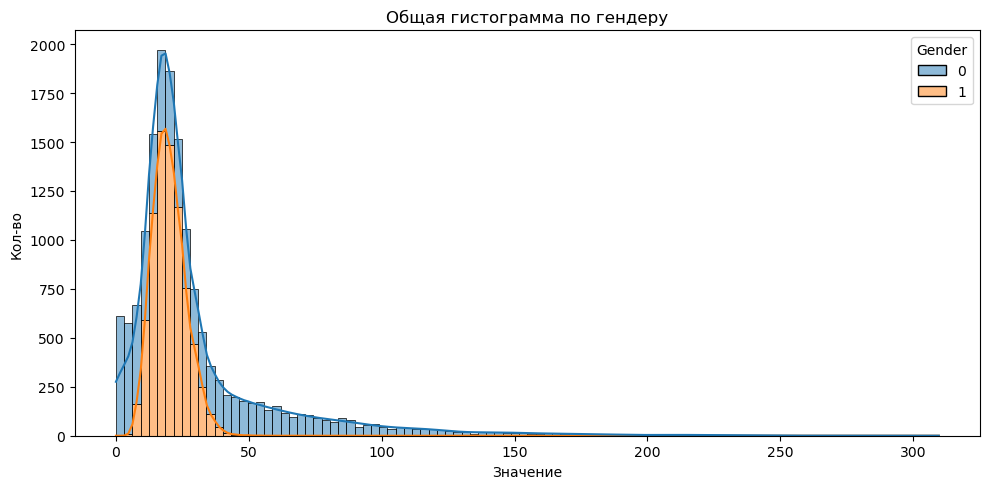

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Графики распределения по гендеру', fontsize=24)

sns.histplot(panel_data.loc[panel_data['Gender'] == 1]['Value_Gender'], kde=True, ax=axes[0])
axes[0].set_title('Распределение для гендера 1')
axes[0].set_xlabel('Значение')
axes[0].set_ylabel('Кол-во')

sns.histplot(panel_data.loc[panel_data['Gender'] == 0]['Value_Gender'], kde=True, ax=axes[1])
axes[1].set_title('Распределение для гендера 0')
axes[1].set_xlabel('Значение')
axes[1].set_ylabel('Кол-во')

plt.tight_layout()

plt.figure(figsize=(10, 5))
sns.histplot(data=panel_data, x='Value_Gender', hue='Gender', kde=True, bins=100, multiple='stack')
plt.title('Общая гистограмма по гендеру')
plt.xlabel('Значение')
plt.ylabel('Кол-во')

plt.tight_layout()
plt.show()

In [20]:
from scipy.stats import norm

# Создаем столбец с отрицательной тенденцией по времени

# Функция для генерации нормально распределенных значений с учетом времени и сущности
def generate_normal_values(row):
    start_value = 50  # Начальное значение
    end_value = 10    # Значение в конце периода
    num_time_periods = len(time_periods)
    time_index = time_periods.get_loc(row['Time'])
    entity_index = row['Entity']
    start_entity_value = np.random.randint(60, 80) + entity_index
    end_entity_value = 20 + entity_index  
    value = start_entity_value + (end_entity_value - start_entity_value) * (time_index / (num_time_periods - 1))
    return norm.rvs(loc=value, scale=5) 

# Функция для создания тенденции
def generate_trend_values(row):
    time_index = time_periods.get_loc(row['Time'])
    entity_index = row['Entity']
    return np.random.randint(60, 80) + entity_index - (50 * time_index / (len(time_periods) - 1))

In [21]:
# Создаем столбец с нормально распределенными значениями
panel_data['Value_Entity'] = panel_data.apply(generate_normal_values, axis=1)
# Создаем столбец с тенденцией
panel_data['Trend'] = panel_data.apply(generate_trend_values, axis=1)
# Корректируем значения с учетом тенденции
panel_data['Value_Trend'] = panel_data['Value_Entity'] + panel_data['Trend']

In [22]:
panel_data

,Time,Entity,Gender,Category,Value,Correlated_Column_Value,Value_Gender,Value_Entity,Trend,Value_Trend
0,2005-01-31,0,0,2,31.171151,65.225462,25.243962,56.994650,71.0,127.994650
1,2005-01-31,1,1,2,28.541357,72.624329,17.518267,72.218175,75.0,147.218175
2,2005-01-31,2,0,8,43.333763,89.098949,101.133156,81.750509,66.0,147.750509
3,2005-01-31,3,0,6,42.940945,73.595580,39.073058,71.716683,68.0,139.716683
4,2005-01-31,4,1,6,48.293871,93.419784,28.776789,68.996790,65.0,133.996790
...,...,...,...,...,...,...,...,...,...,...
15595,2017-12-31,95,1,0,13.292704,50.171217,27.523553,126.551020,115.0,241.551020
15596,2017-12-31,96,1,4,50.411843,62.032251,15.650963,114.128324,109.0,223.128324
15597,2017-12-31,97,0,1,36.475538,95.996194,28.502206,107.572342,115.0,222.572342
15598,2017-12-31,98,0,6,47.258260,76.812457,16.322681,113.371601,118.0,231.371601


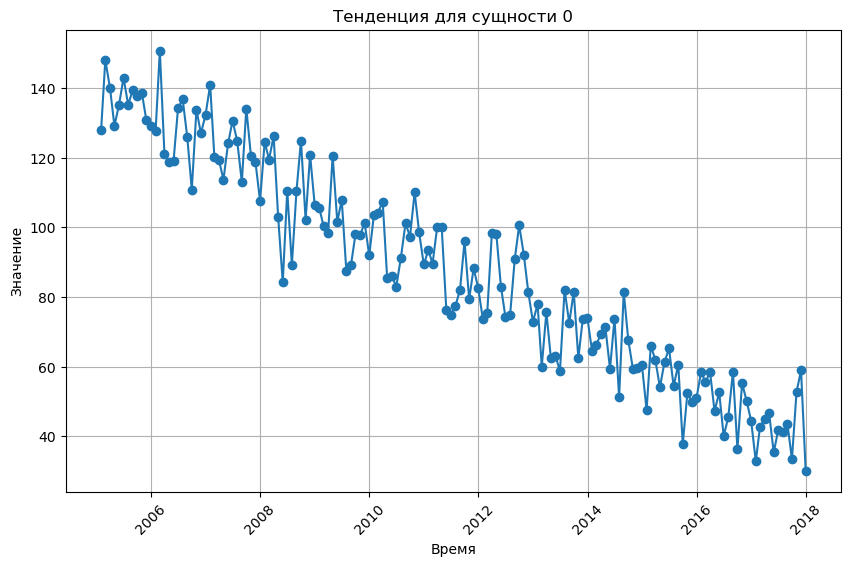

In [23]:
selected_entity = 0
entity_data = panel_data.loc[panel_data['Entity'] == selected_entity]

plt.figure(figsize=(10, 6))
plt.plot(entity_data['Time'], entity_data['Value_Trend'], marker='o', linestyle='-')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title(f'Тенденция для сущности {selected_entity}')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [24]:
panel_data.to_csv('panel_data.csv', index=False)